<a href="https://colab.research.google.com/github/SHuBhAM71205/pytorch/blob/main/Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# @title pytorch workflow

flow={
        1:"get the data",
        2:"build model",
        3:"fit to dat",
        4:"make predictions",
        5:"save the model weights"
      }


In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt


device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [5]:
from os import WEXITED
#@title creating data

# may be any thing

# get everything to neural network

# let use linear regression

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

In [6]:
# @title split into train and test

x_train=X[:int(0.7*len(X))]
y_train=y[:int(0.7*len(X))]
x_test=X[int(0.7*len(X)):]
y_test=y[int(0.7*len(X)):]


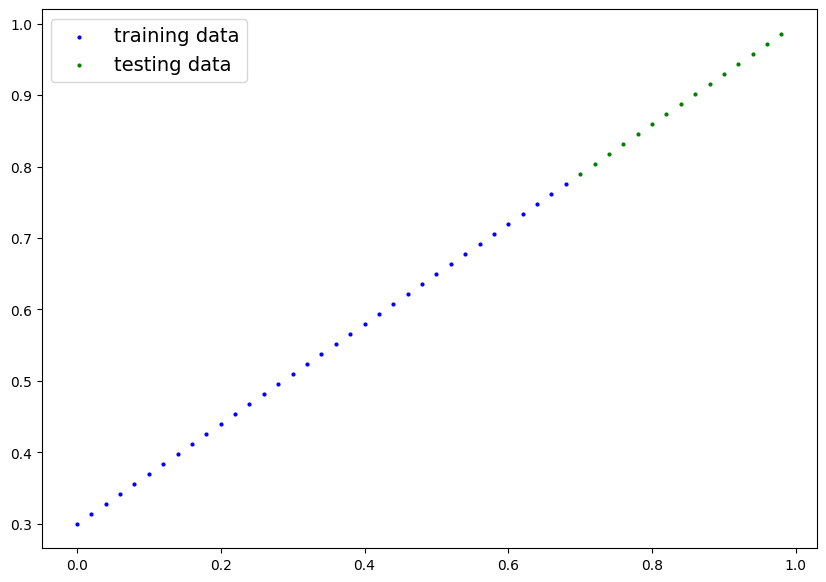

In [7]:
# @title visualization of the data

def plot(train_data,train_label ,test_data ,test_label,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_label,c="b",s=4,label="training data")
  plt.scatter(test_data,test_label,c="g",s=4,label="testing data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")

  plt.legend(prop={"size":14})
  pass

plot(x_train,y_train,x_test,y_test)

In [8]:
# @title model for the linear reg

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights * x + self.bias



In [9]:
# @title checking the parameter of the model
torch.manual_seed(42)
model=LinearRegressionModel()
# list(model.parameters())

model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

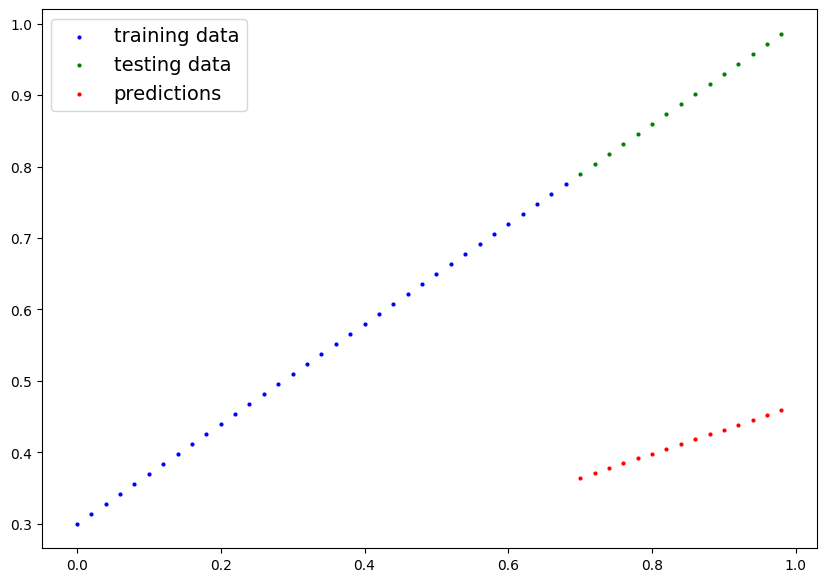

In [10]:
# make pred using torch.inference_mode

# pass data it run through the forward methode

with torch.inference_mode():
  y_preds=model(x_test)

  plot(x_train,y_train,x_test,y_test,y_preds)

In [11]:
# @title training

# trainig is moving w ,b towards the close to the real w,b

# the loss func is 'kintne galat ho sakte ho bae`



#

In [33]:
# @title Loss function, Optimizer
L1loss=torch.nn.L1Loss()

Optimizer=torch.optim.SGD(params=model.parameters(),lr=0.001)



##### loop through data
##### forward pass
##### calculate loss
##### update params with the grad
##### do again till we reach  the particular opptimization


In [43]:
# @title training loop
## its always a good idea to do the
epoch = 10
for e in range(epoch):
  model.train()

  y_pred=model(x_train)

  loss=L1loss(y_pred,y_train)
  print(f"loss is {loss}")
  Optimizer.zero_grad()

  loss.backward()

  Optimizer.step()

  # model.eval()
  print(f"{model.state_dict()}")

# plot(x_train,y_train,x_test,y_test,model.forward(x_test))

loss is 0.003984734881669283
OrderedDict({'weights': tensor([0.6943]), 'bias': tensor([0.3091])})
loss is 0.007171265780925751
OrderedDict({'weights': tensor([0.6909]), 'bias': tensor([0.2991])})
loss is 0.003984734881669283
OrderedDict({'weights': tensor([0.6943]), 'bias': tensor([0.3091])})
loss is 0.007171265780925751
OrderedDict({'weights': tensor([0.6909]), 'bias': tensor([0.2991])})
loss is 0.003984734881669283
OrderedDict({'weights': tensor([0.6943]), 'bias': tensor([0.3091])})
loss is 0.007171265780925751
OrderedDict({'weights': tensor([0.6909]), 'bias': tensor([0.2991])})
loss is 0.003984734881669283
OrderedDict({'weights': tensor([0.6943]), 'bias': tensor([0.3091])})
loss is 0.007171265780925751
OrderedDict({'weights': tensor([0.6909]), 'bias': tensor([0.2991])})
loss is 0.003984734881669283
OrderedDict({'weights': tensor([0.6943]), 'bias': tensor([0.3091])})
loss is 0.007171265780925751
OrderedDict({'weights': tensor([0.6909]), 'bias': tensor([0.2991])})


test loss is 0.008513974957168102


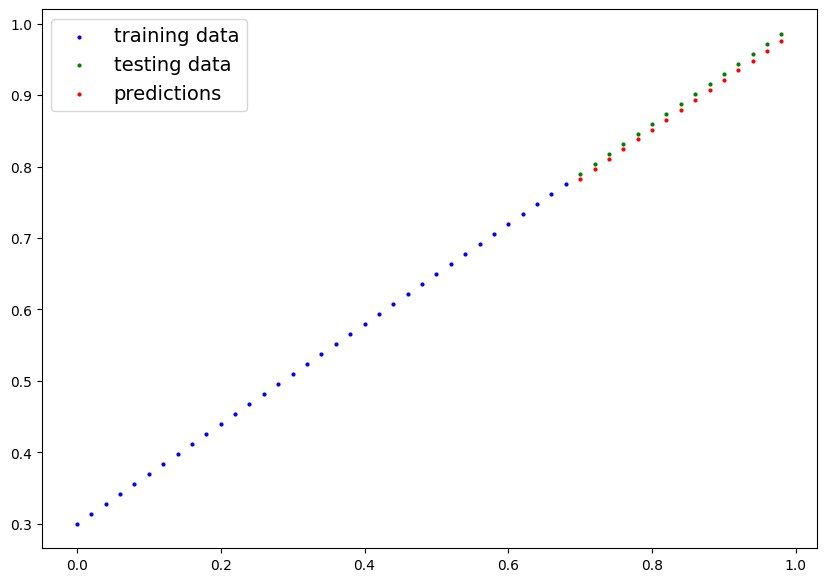

In [47]:
# @title testing

with torch.inference_mode():
  y_preds=model(x_test)
  test_loss=L1loss(y_preds,y_test)
  print(f"test loss is {test_loss}")
plot(x_train,y_train,x_test,y_test,y_preds)

In [48]:
# @title saving and loading the model

from pathlib import Path

# torch.save()

# save in the python pickel formate

# torch.load()

# torch.nn.Module.load_state_dict()

MODEL_PATH=Path("model.pth")
MODEL_PATH.parent.mkdir(parents=True,exist_ok=True)



torch.save(obj=model.state_dict(),f=MODEL_PATH)


# loading the model

loaded_model=LinearRegressionModel()

loaded_model.load_state_dict(torch.load(f=MODEL_PATH))

# loaded_model.eval()